<a href="https://colab.research.google.com/github/JaiVardhan1997/New-Project/blob/main/E_Commerce_Products_Recommendation_System_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0: Load Packages and Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

Data Loading and Preprocessing

In [4]:
# Read your dataset (replace 'marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv' with your dataset path)
train_data = pd.read_csv("/content/sample_data/marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv", sep='\t')

train_data.head(3)


,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af


In [5]:
print(train_data.shape)
print(train_data.columns)

(5000, 32)
Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')


In [6]:
train_data.isnull().sum()

,0
Uniq Id,0
Crawl Timestamp,0
Dataset Origin,5000
Product Id,0
Product Barcode,5000
Product Company Type Source,0
Product Brand Source,4861
Product Brand Normalised Source,4861
Product Name Source,4861
Match Rank,5000


In [7]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [8]:
train_data.isnull().sum()
missing_data = train_data.isnull().sum()
missing_percent = (train_data.isnull().sum() / len(train_data)) * 100

print(pd.DataFrame({'Missing Count': missing_data, 'Missing Percent': missing_percent}))
#this code--pd.DataFrame({'Missing Count': missing_data, 'Missing Percent': missing_percent}), This code creats a dataframe from dictionary: having key and value.



                       Missing Count  Missing Percent
Uniq Id                            0             0.00
Product Id                         0             0.00
Product Rating                  2806            56.12
Product Reviews Count           1654            33.08
Product Category                  10             0.20
Product Brand                     13             0.26
Product Name                       0             0.00
Product Image Url                  0             0.00
Product Description             1127            22.54
Product Tags                       0             0.00


In [9]:
train_data[['Product Tags','Product Rating']]

,Product Tags,Product Rating
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN
1,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN
2,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN
4,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN
...,...,...
4995,"Garden Mint Room Spray (Double Strength), 4 ou...",4.5
4996,Garnier Nutrisse Nourishing Hair Color Creme (...,3.9
4997,"Nail File Electric Drill, 6 in 1 Professional ...",NaN
4998,Creed Love In Black Hair And Body Wash 6.8oz/2...,NaN


In [10]:
train_data.loc[:, ['Product Tags', 'Product Rating']] # All the rows and two colums are only selected
# the---df.loc[row_selection, column_selection]

,Product Tags,Product Rating
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN
1,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN
2,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN
4,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN
...,...,...
4995,"Garden Mint Room Spray (Double Strength), 4 ou...",4.5
4996,Garnier Nutrisse Nourishing Hair Color Creme (...,3.9
4997,"Nail File Electric Drill, 6 in 1 Professional ...",NaN
4998,Creed Love In Black Hair And Body Wash 6.8oz/2...,NaN


In [11]:
train_data['Product Reviews Count'].fillna(0, inplace=True)
train_data['Product Description'].fillna('No description', inplace=True)
train_data['Product Rating'].fillna(train_data['Product Rating'].mode()[0], inplace=True)
#mode()[0] ensures you always get a single value for fillna()
#It handles both single-mode and multi-mode cases gracefully
#When multiple modes exist, it uses the first one (which is arbitrary but consistent)
#This is a safe, concise way to use the most frequent value for imputation




/tmp/ipython-input-2989380334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Reviews Count'].fillna(0, inplace=True)
/tmp/ipython-input-2989380334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [12]:
# Step 1: Remove rows with missing Category and Brand (critical identifiers)
train_data = train_data.dropna(subset=['Product Category', 'Product Brand'])

# Step 2: Handle other missing data
print("Missing data after removing Category/Brand:")
print(train_data.isnull().sum())

Missing data after removing Category/Brand:
Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64


In [13]:
train_data.duplicated().sum()

np.int64(0)

In [14]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [15]:
train_data.columns

Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Brand', 'Name',
       'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [16]:
print("Data types:")
print(train_data[['ID', 'ProdID']].dtypes)
train_data.head()

Data types:
ID        object
ProdID    object
dtype: object


,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,5.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,No description,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,5.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,5.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,5.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [17]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)


**EDA: Exploratory data analysis**

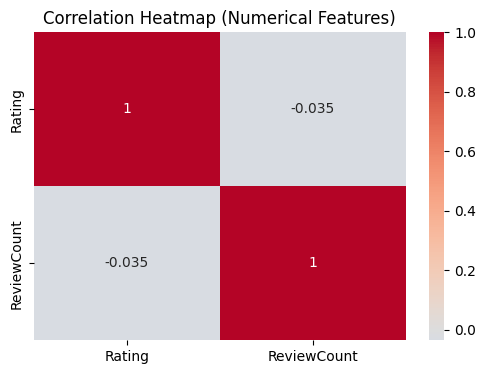

In [18]:
# Heat Map:
# Correlation Heatmap (Numerical Only)

#Since you only have Rating and ReviewCount as numeric, you can still check correlation:

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(train_data[['Rating','ReviewCount']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

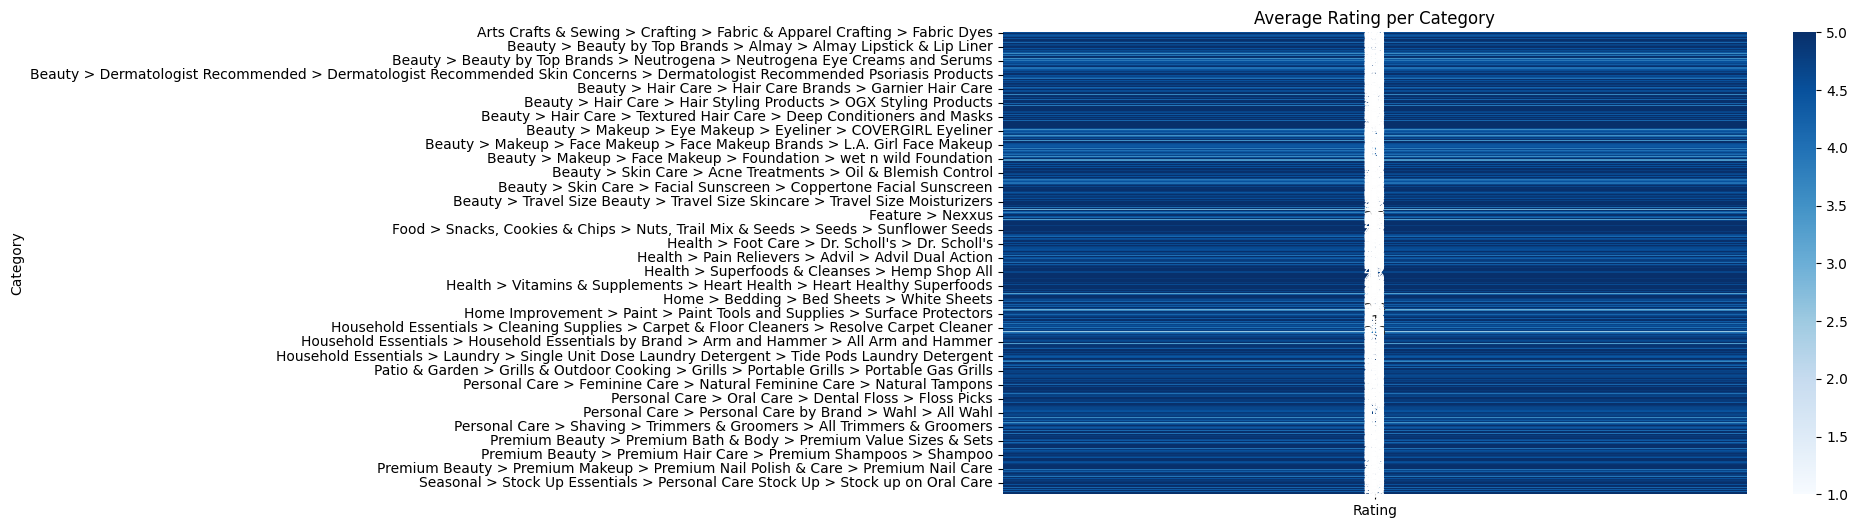

In [19]:
##Option 3: Category vs. Rating/Reviews Heatmap

#You can aggregate categorical features (like Category or Brand) with numeric ones.

#Example: average rating per category

cat_rating = train_data.groupby('Category')['Rating'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.heatmap(cat_rating.pivot_table(index='Category', values='Rating'),
            annot=True, cmap='Blues', cbar=True)
plt.title("Average Rating per Category")
plt.show()

**Bar Plot (Reviews vs Rating, colored by Category)**

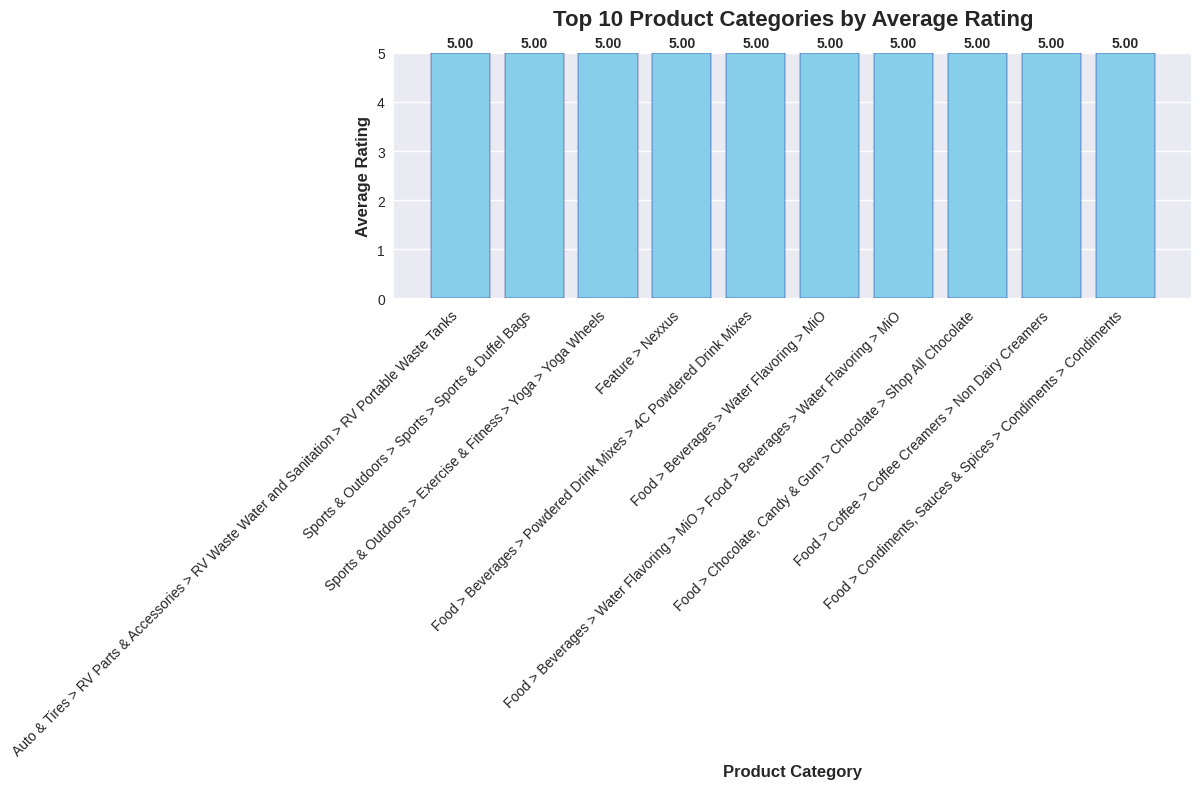

In [20]:

# Set style for better visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Calculate average rating for each category
category_ratings = train_data.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Get top 10 categories by average rating
top_10_categories = category_ratings.head(10)

# Create the bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_categories.index, top_10_categories.values, color='skyblue', edgecolor='navy')

# Customize the plot
plt.title('Top 10 Product Categories by Average Rating', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel('Average Rating', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)  # Assuming rating scale is 1-5

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()



** Most popular items**

Text(0, 0.5, 'Total Rating counts')

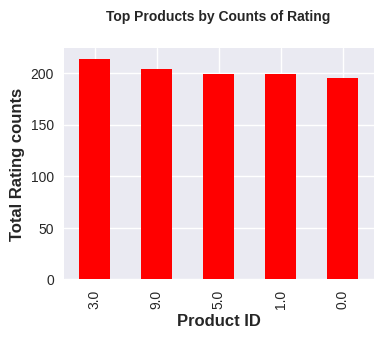

In [21]:
plt.figure(figsize=(4, 3))
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")
plt.title('Top Products by Counts of Rating', fontsize=10, fontweight='bold', pad=20)
plt.xlabel('Product ID', fontsize=12, fontweight='bold')
plt.ylabel('Total Rating counts', fontsize=12, fontweight='bold')

<Axes: xlabel='Rating'>

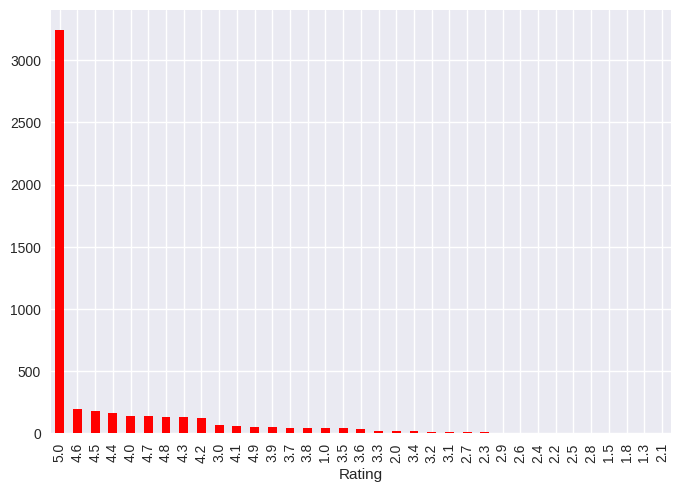

In [22]:
# most rated counts

train_data['Rating'].value_counts().plot(kind='bar',color='red')

#X-axis: The unique Rating values (e.g., 1, 2, 3, 4, 5).
#Y-axis: The count (frequency) of rows/products/reviews that have that rating.


**Data Cleaning and Tags Creations**

In [23]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [24]:
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)
train_data.head(2)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,5.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,description,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,5.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."


##
def preprocess_text(text):
    doc = nlp(text)
    # Remove stopwords, punctuation, and lemmatize
    tokens = [token.lemma_.lower() for token in doc
              if not token.is_stop and not token.is_punct and token.is_alpha]
    return " ".join(tokens)

In [25]:
#(def preprocess_text(text):
    #doc = nlp(text)
    # Remove stopwords, punctuation, and lemmatize
    #tokens = [token.lemma_.lower() for token in doc
              #if not token.is_stop and not token.is_punct and token.is_alpha]
    #return " ".join(tokens))

#Similarity Detection
#python
#doc1 = nlp("I like cats")
#doc2 = nlp("I love kittens")
#print(doc1.similarity(doc2))  # High similarity score

##*Rating* Base Recommendations System

In [26]:
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [27]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [28]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)

/tmp/ipython-input-565725879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
/tmp/ipython-input-565725879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [29]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]
rating_base_recommendation.head(5)

Rating Base Recommendation System: (Trending Products)


/tmp/ipython-input-1981862475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]


,Name,ReviewCount,Brand,ImageURL,Rating
5,($132 Value) Satin Smooth Hydrasonic Professio...,7,"satin, smooth",https://i5.walmartimages.com/asr/67d60a8c-32e7...,5
4968,wnw i-shimmer eyepencil sky li,0,"wet, n, wild",https://i5.walmartimages.com/asr/806e2816-e092...,5
6,($14 Value) Burts Bees Beeswax Bounty Classic ...,10,"burt, bees",https://i5.walmartimages.com/asr/bfbb58dc-8199...,5
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1,"peter, thomas, roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5
4952,theBalm Meet Matte Hughes Long Lasting Liquid ...,24,thebalm,https://i5.walmartimages.com/asr/a5cb990f-21c5...,5


##Content Base Recommendation system (User Preferences or Items similarities)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [31]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = train_data[train_data['Name']==item_name].index[0]

In [32]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [33]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]



In [34]:
recommended_items_indics = [x[0] for x in top_similar_items]
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


**Function To Recommend Products for Content Base**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [36]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,5.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,5.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,5.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,5.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,5.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


In [37]:
# Example: Get content-based recommendations for a specific item
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,5.0
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,5.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,5.0
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
3023,Be Matte Lipstick - Pink,2.0,"city, color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0


# Collaborative Filtering (User Item Similarity)

In [53]:
def collaborative_filtering_recommendations_optimized(train_data, target_user_id, top_n=10):
    """
    Enhanced collaborative filtering that prioritizes:
    1. High ratings
    2. High review counts
    3. User similarity
    """

    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(
        index='ID', columns='ProdID', values='Rating', aggfunc='mean'
    ).fillna(0)

    # Calculate user similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find target user index
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get similarity scores and find most similar users
    user_similarities = user_similarity[target_user_index]
    similar_users_indices = user_similarities.argsort()[::-1][1:]  # Exclude self

    # Collect candidate items with scores
    candidate_items = {}

    for user_index in similar_users_indices:
        similar_user_id = user_item_matrix.index[user_index]
        similarity_score = user_similarities[user_index]

        # Get items rated by similar user but not by target user
        similar_user_ratings = user_item_matrix.iloc[user_index]
        target_user_ratings = user_item_matrix.iloc[target_user_index]

        # Items that similar user rated but target user didn't
        candidate_mask = (similar_user_ratings > 0) & (target_user_ratings == 0)
        candidate_item_ids = user_item_matrix.columns[candidate_mask]

        for item_id in candidate_item_ids:
            if item_id not in candidate_items:
                # Get item details including review count and average rating
                item_data = train_data[train_data['ProdID'] == item_id].iloc[0]

                candidate_items[item_id] = {
                    'similarity_score': similarity_score,
                    'item_rating': similar_user_ratings[item_id],  # Rating from similar user
                    'avg_rating': item_data['Rating'],  # Overall average rating
                    'review_count': item_data['ReviewCount'],
                    'name': item_data['Name'],
                    'brand': item_data['Brand'],
                    'image_url': item_data['ImageURL']
                }

    # Convert to DataFrame for sorting
    if not candidate_items:
        return pd.DataFrame()  # No recommendations

    recommendations_df = pd.DataFrame.from_dict(candidate_items, orient='index')
    recommendations_df = recommendations_df.reset_index().rename(columns={'index': 'ProdID'})

    # Calculate composite score (prioritizing both rating and review count)
    recommendations_df['composite_score'] = (
        (recommendations_df['avg_rating'] / 5.0) * 0.4 +          # Rating weight: 40%
        (recommendations_df['review_count'] / recommendations_df['review_count'].max()) * 0.3 +  # Review count weight: 30%
        (recommendations_df['similarity_score']) * 0.3            # Similarity weight: 30%
    )

    # Sort by composite score (highest first)
    recommendations_df = recommendations_df.sort_values('composite_score', ascending=False)

    # Return top N recommendations with all details
    final_recommendations = recommendations_df.head(top_n)[[
        'ProdID', 'name', 'brand', 'avg_rating', 'review_count',
        'composite_score', 'image_url'
    ]]

    return final_recommendations

# Alternative version with MAXIMUM priority on review count and rating
def collaborative_filtering_max_priority(train_data, target_user_id, top_n=10):
    """
    Version that gives MAXIMUM priority to review count and ratings
    """

    # Create user-item matrix (same as before)
    user_item_matrix = train_data.pivot_table(
        index='ID', columns='ProdID', values='Rating', aggfunc='mean'
    ).fillna(0)

    user_similarity = cosine_similarity(user_item_matrix)
    target_user_index = user_item_matrix.index.get_loc(target_user_id)
    user_similarities = user_similarity[target_user_index]
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    candidate_items = {}

    for user_index in similar_users_indices:
        similar_user_ratings = user_item_matrix.iloc[user_index]
        target_user_ratings = user_item_matrix.iloc[target_user_index]

        candidate_mask = (similar_user_ratings > 0) & (target_user_ratings == 0)
        candidate_item_ids = user_item_matrix.columns[candidate_mask]

        for item_id in candidate_item_ids:
            if item_id not in candidate_items:
                item_data = train_data[train_data['ProdID'] == item_id].iloc[0]

                candidate_items[item_id] = {
                    'avg_rating': item_data['Rating'],
                    'review_count': item_data['ReviewCount'],
                    'name': item_data['Name'],
                    'brand': item_data['Brand'],
                    'image_url': item_data['ImageURL'],
                    'similar_user_rating': similar_user_ratings[item_id]
                }

    if not candidate_items:
        return pd.DataFrame()

    recommendations_df = pd.DataFrame.from_dict(candidate_items, orient='index')
    recommendations_df = recommendations_df.reset_index().rename(columns={'index': 'ProdID'})

    # MAXIMUM PRIORITY to Review Count and Rating
    # Normalize ratings (0-1 scale)
    recommendations_df['rating_score'] = recommendations_df['avg_rating'] / 5.0

    # Normalize review count (0-1 scale)
    max_reviews = recommendations_df['review_count'].max()
    recommendations_df['review_score'] = recommendations_df['review_count'] / max_reviews

    # Combined score: 50% rating + 50% review count (MAXIMUM emphasis)
    recommendations_df['final_score'] = (
        recommendations_df['rating_score'] * 0.5 +
        recommendations_df['review_score'] * 0.5
    )

    # Sort by final score (highest first)
    recommendations_df = recommendations_df.sort_values('final_score', ascending=False)

    # Return top recommendations
    return recommendations_df.head(top_n)[[
        'ProdID', 'name', 'brand', 'avg_rating', 'review_count',
        'final_score', 'image_url'
    ]]

# Example usage
target_user_id = 4
print(f"Top recommendations for User {target_user_id}:")

# Get optimized recommendations
optimized_recs = collaborative_filtering_recommendations_optimized(train_data, target_user_id)
print("Optimized Recommendations (Balanced Approach):")
print(optimized_recs)

# Get maximum priority recommendations
max_priority_recs = collaborative_filtering_max_priority(train_data, target_user_id)
print("\nMaximum Priority to Rating & Reviews:")
print(max_priority_recs)

Top recommendations for User 4:
Optimized Recommendations (Balanced Approach):
            ProdID                                               name  \
735   9.978813e+09  Clairol Nice n Easy Sun-Kissed Permanent Hair ...   
583   6.176400e+04  Clairol Nice n Easy Permanent Hair Color Creme...   
560   9.200000e+02  Clairol Nice n Easy Permanent Hair Color Creme...   
914   9.787000e+03  Clairol Nice n Easy Permanent Hair Color Creme...   
1577  2.520000e+02  Clairol Nice N Easy Permanent Color 6G/116A Na...   
1233  2.268000e+03  Clairol Nice n Easy Permanent Hair Color Creme...   
1100  3.879000e+03  Clairol Nicen Easy Permanent Hair Color Crème ...   
673   6.464600e+04  Replens Long-Lasting Vaginal Moisturizer, 8ct ...   
190   3.850000e+02  Garnier Olia Oil Powered Permanent Hair Color,...   
45    9.700000e+02  Garnier Whole Blends Repairing Shampoo Honey T...   

        brand  avg_rating  review_count  composite_score  \
735   clairol         5.0       29242.0         0.752002 

# Advanced Hybrid Recommendation with Intelligent Scoring System

In [74]:
# Even better: Advanced hybrid with scoring
def hybrid_recommendations_advanced(train_data, target_user_id, item_name, top_n=10,
                                  content_weight=0.5, collaborative_weight=0.5,
                                  rating_weight=0.6, review_weight=0.4):
    """
    Advanced hybrid recommendation with intelligent scoring system
    """

    # Get extended recommendations from both methods
    content_rec = content_based_recommendations(train_data, item_name, top_n*3)
    collaborative_rec = collaborative_filtering_recommendations_optimized(train_data, target_user_id, top_n*3)

    # Create scoring system
    hybrid_scores = {}

    # Score content-based recommendations
    for idx, item in content_rec.iterrows():
        item_id = item['ProdID'] if 'ProdID' in item else idx

        # Calculate base score from content-based method
        content_score = content_weight

        # Add rating and review components
        rating_score = (item['Rating'] / 5.0) * rating_weight if 'Rating' in item else 0
        max_content_reviews = content_rec['ReviewCount'].max()
        review_score = (item['ReviewCount'] / max_content_reviews) * review_weight if 'ReviewCount' in item else 0


        hybrid_scores[item_id] = {
            'content_score': content_score + rating_score + review_score,
            'source': 'content',
            'details': item
        }

    # Score collaborative recommendations
    for idx, item in collaborative_rec.iterrows():
        item_id = item['ProdID'] if 'ProdID' in item else idx

        if item_id in hybrid_scores:
            # Item exists in both methods - boost score
            hybrid_scores[item_id]['content_score'] += collaborative_weight
            hybrid_scores[item_id]['source'] = 'hybrid'
        else:
            # New item from collaborative filtering
            rating_score = (item['Rating'] / 5.0) * rating_weight if 'Rating' in item else 0
            review_score = (item['ReviewCount'] / item['ReviewCount'].max()) * review_weight if 'ReviewCount' in item else 0

            hybrid_scores[item_id] = {
                'content_score': collaborative_weight + rating_score + review_score,
                'source': 'collaborative',
                'details': item
            }

    # Convert to DataFrame and sort by score
    recommendations_list = []
    for item_id, scores in hybrid_scores.items():
        rec_data = scores['details'].copy()
        rec_data['hybrid_score'] = scores['content_score']
        rec_data['source'] = scores['source']
        recommendations_list.append(rec_data)

    if not recommendations_list:
        return pd.DataFrame()

    hybrid_df = pd.DataFrame(recommendations_list)
    hybrid_df = hybrid_df.sort_values('hybrid_score', ascending=False)

    return hybrid_df.head(top_n)

In [73]:
# Run comparison
target_user_id = 10
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

print(f"Hybrid recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_recommendations_advanced(train_data, target_user_id, item_name)


Hybrid recommendations for User 10 and Item 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath':


,Name,ReviewCount,Brand,ImageURL,Rating,hybrid_score,source,ProdID,name,brand,avg_rating,review_count,composite_score,image_url
1687,"OPI Nail Polish, Machu Peach-U, 0.5 Fl Oz",331.0,opi,https://i5.walmartimages.com/asr/2d8f8250-86c2...,4.3,1.416000,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,"OPI Nail Polish, Closer Than You Might Belém, ...",11.0,opi,https://i5.walmartimages.com/asr/d6e17601-0b25...,5.0,1.113293,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1594,Nail Lacquer - # NL E74 Youre Such a BudaPest ...,5.0,opi,https://i5.walmartimages.com/asr/bb6e42b8-35ee...,5.0,1.106042,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,5.0,1.106042,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1633,"OPI Nail Lacquer, Teal The Cows Come Home, 0.5 Oz",2.0,opi,https://i5.walmartimages.com/asr/16f3dafc-2430...,5.0,1.102417,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,5.0,1.101208,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0,1.101208,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0,1.101208,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,5.0,1.101208,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1215,OPI Nail Lacquer Polish .5oz/15mL - Put A Coat...,0.0,opi,https://i5.walmartimages.com/asr/b51a716d-565c...,5.0,1.100000,content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
